<a href="https://colab.research.google.com/github/bhaktichowkwale/DataMiningProject/blob/master/CMPE255_EDA_NYCParkingTickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NYC Parking tickets Analysis

## Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/Parking_Violations_Issued_Fiscal_Year_2015.zip"

Archive:  /content/gdrive/My Drive/Parking_Violations_Issued_Fiscal_Year_2015.zip
  inflating: Parking_Violations_Issued_-_Fiscal_Year_2015.csv  


In [ ]:
!ls

gdrive	Parking_Violations_Issued_-_Fiscal_Year_2015.csv  sample_data


## Load the data

In [ ]:
data_2014_2015 = pd.read_csv("Parking_Violations_Issued_-_Fiscal_Year_2015.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,29,38,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print("There are", data_2014_2015.shape[0], "rows and", data_2014_2015.shape[1], "columns in the dataframe for the year 2014-2015.")
data_2014_2015

There are 11809233 rows and 51 columns in the dataframe for the year 2014-2015.


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,8002531292,EPC5238,NY,PAS,10/01/2014,21,SUBN,CHEVR,T,20390,29890,31490,01/01/20150111 12:00:00 PM,7.0,7,7,345454,T800,A2,0011A,NaN,NY,F,133,Essex St,NaN,01/05/0001 12:00:00 PM,408.0,d1,NaN,Y Y Y,1200A,0300A,BL,NaN,2005.0,NaN,0.0,A 77,21-No Parking (street clean),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8015318440,5298MD,NY,COM,03/06/2015,14,VAN,FRUEH,T,27790,19550,19570,01/01/88888888 12:00:00 PM,25.0,25,25,333386,T103,B,0942A,NaN,NY,F,1916,Park Ave,NaN,01/05/0001 12:00:00 PM,408.0,c,NaN,YYYYY,0700A,1000A,BROWN,NaN,0.0,NaN,0.0,CC3,14-No Standing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7611181981,FYW2775,NY,PAS,07/28/2014,46,SUBN,SUBAR,T,8130,5430,5580,01/01/20160524 12:00:00 PM,72.0,72,72,331845,T302,L,1020A,NaN,K,F,184,31st St,NaN,01/05/0001 12:00:00 PM,408.0,f1,NaN,NaN,NaN,NaN,BLACK,NaN,2010.0,NaN,0.0,J 32,46A-Double Parking (Non-COM),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7445908067,GWE1987,NY,PAS,04/13/2015,19,4DSD,LEXUS,T,59990,16540,16790,01/01/20170111 12:00:00 PM,102.0,102,102,355669,T402,D,0318P,NaN,Q,F,120-20,Queens Blvd,NaN,01/05/0001 12:00:00 PM,408.0,c3,NaN,YYYYY,0300P,1000P,GY,NaN,2015.0,NaN,0.0,01 4,19-No Stand (bus stop),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7037692864,T671196C,NY,PAS,05/19/2015,19,4DSD,CHRYS,T,36090,10410,24690,01/01/88888888 12:00:00 PM,28.0,28,28,341248,T103,X,0410P,NaN,NY,F,66,W 116th St,NaN,01/05/0001 12:00:00 PM,408.0,c3,NaN,YYYYYYY,NaN,NaN,BLACK,NaN,0.0,NaN,0.0,19 7,19-No Stand (bus stop),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809228,8035170326,VCT8217,VA,PAS,05/19/2015,14,4DSD,HONDA,T,72830,82930,73190,01/01/20150988 12:00:00 PM,81.0,81,81,346199,T301,L,0137P,NaN,K,O,424,Pulaski St,NaN,01/05/0001 12:00:00 PM,408.0,c,NaN,YYYYYYY,NaN,NaN,BLACK,NaN,0.0,NaN,0.0,A 31,14-No Standing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11809229,8005276357,GHK4864,NY,PAS,10/20/2014,31,SUBN,ME/BE,T,34210,10410,10510,01/01/20150710 12:00:00 PM,14.0,14,14,359305,T102,K,0122P,NaN,NY,F,52,W 22nd St,NaN,01/05/0001 12:00:00 PM,408.0,l3,NaN,YYYYY,0800A,0600P,GY,NaN,2013.0,NaN,0.0,03 6,31-No Stand (Com. Mtr. Zone),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11809230,7155525273,T616724C,NY,OMT,09/25/2014,31,4DSD,LINCO,T,10610,34750,34770,01/01/20141031 12:00:00 PM,18.0,18,18,357700,T106,H,0222P,NaN,NY,F,745,7th Ave,NaN,01/05/0001 12:00:00 PM,408.0,l3,NaN,YYYYY,0700A,0600P,BLACK,NaN,2007.0,NaN,0.0,99 6,31-No Stand (Com. Mtr. Zone),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11809231,8044311063,97720MD,NY,COM,06/03/2015,51,DUMP,PETER,T,10540,12140,47290,01/01/20151031 12:00:00 PM,104.0,104,104,361081,T401,N,0617P,NaN,Q,F,58-26,47th St,NaN,01/05/0001 12:00:00 PM,408.0,e3,NaN,NaN,NaN,NaN,WHITE,NaN,1995.0,NaN,0.0,K 41,51-Sidewalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_2014_2015_df = pd.DataFrame(data_2014_2015)
data_2014_2015_df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,8002531292,EPC5238,NY,PAS,10/01/2014,21,SUBN,CHEVR,T,20390,29890,31490,01/01/20150111 12:00:00 PM,7.0,7,7,345454,T800,A2,0011A,NaN,NY,F,133,Essex St,NaN,01/05/0001 12:00:00 PM,408.0,d1,NaN,Y Y Y,1200A,0300A,BL,NaN,2005.0,NaN,0.0,A 77,21-No Parking (street clean),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8015318440,5298MD,NY,COM,03/06/2015,14,VAN,FRUEH,T,27790,19550,19570,01/01/88888888 12:00:00 PM,25.0,25,25,333386,T103,B,0942A,NaN,NY,F,1916,Park Ave,NaN,01/05/0001 12:00:00 PM,408.0,c,NaN,YYYYY,0700A,1000A,BROWN,NaN,0.0,NaN,0.0,CC3,14-No Standing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7611181981,FYW2775,NY,PAS,07/28/2014,46,SUBN,SUBAR,T,8130,5430,5580,01/01/20160524 12:00:00 PM,72.0,72,72,331845,T302,L,1020A,NaN,K,F,184,31st St,NaN,01/05/0001 12:00:00 PM,408.0,f1,NaN,NaN,NaN,NaN,BLACK,NaN,2010.0,NaN,0.0,J 32,46A-Double Parking (Non-COM),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7445908067,GWE1987,NY,PAS,04/13/2015,19,4DSD,LEXUS,T,59990,16540,16790,01/01/20170111 12:00:00 PM,102.0,102,102,355669,T402,D,0318P,NaN,Q,F,120-20,Queens Blvd,NaN,01/05/0001 12:00:00 PM,408.0,c3,NaN,YYYYY,0300P,1000P,GY,NaN,2015.0,NaN,0.0,01 4,19-No Stand (bus stop),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7037692864,T671196C,NY,PAS,05/19/2015,19,4DSD,CHRYS,T,36090,10410,24690,01/01/88888888 12:00:00 PM,28.0,28,28,341248,T103,X,0410P,NaN,NY,F,66,W 116th St,NaN,01/05/0001 12:00:00 PM,408.0,c3,NaN,YYYYYYY,NaN,NaN,BLACK,NaN,0.0,NaN,0.0,19 7,19-No Stand (bus stop),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809228,8035170326,VCT8217,VA,PAS,05/19/2015,14,4DSD,HONDA,T,72830,82930,73190,01/01/20150988 12:00:00 PM,81.0,81,81,346199,T301,L,0137P,NaN,K,O,424,Pulaski St,NaN,01/05/0001 12:00:00 PM,408.0,c,NaN,YYYYYYY,NaN,NaN,BLACK,NaN,0.0,NaN,0.0,A 31,14-No Standing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11809229,8005276357,GHK4864,NY,PAS,10/20/2014,31,SUBN,ME/BE,T,34210,10410,10510,01/01/20150710 12:00:00 PM,14.0,14,14,359305,T102,K,0122P,NaN,NY,F,52,W 22nd St,NaN,01/05/0001 12:00:00 PM,408.0,l3,NaN,YYYYY,0800A,0600P,GY,NaN,2013.0,NaN,0.0,03 6,31-No Stand (Com. Mtr. Zone),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11809230,7155525273,T616724C,NY,OMT,09/25/2014,31,4DSD,LINCO,T,10610,34750,34770,01/01/20141031 12:00:00 PM,18.0,18,18,357700,T106,H,0222P,NaN,NY,F,745,7th Ave,NaN,01/05/0001 12:00:00 PM,408.0,l3,NaN,YYYYY,0700A,0600P,BLACK,NaN,2007.0,NaN,0.0,99 6,31-No Stand (Com. Mtr. Zone),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11809231,8044311063,97720MD,NY,COM,06/03/2015,51,DUMP,PETER,T,10540,12140,47290,01/01/20151031 12:00:00 PM,104.0,104,104,361081,T401,N,0617P,NaN,Q,F,58-26,47th St,NaN,01/05/0001 12:00:00 PM,408.0,e3,NaN,NaN,NaN,NaN,WHITE,NaN,1995.0,NaN,0.0,K 41,51-Sidewalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis 

### State-Wise Vehicle Registration

In [ ]:
# Get the counts of the all registration states
# reg_states_all = Counter(data_2014_2015_df['Registration State'])
# reg_states_all

# Get top 10 highest registration states
regStates_top10 = data_2014_2015_df['Registration State'].value_counts()[0:10]
regStates_top10

NY    9193289
NJ    1080414
PA     298877
CT     160361
FL     148868
MA     101164
IN      83192
VA      81464
MD      63416
NC      58871
Name: Registration State, dtype: int64

Text(0, 0.5, 'Number of Registrations')

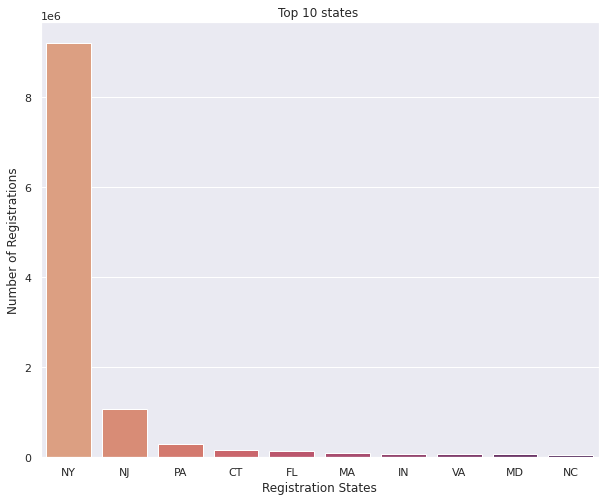

In [ ]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(x = regStates_top10.index, y = regStates_top10.values, palette="flare")
plt.title('Top 10 states ')
plt.xlabel('Registration States')
plt.ylabel('Number of Registrations')

### Violation Times

In [ ]:
import datetime

v_time = data_2014_2015_df['Violation Time'].value_counts()[0:30]

vt_df = pd.DataFrame()

for i in range(len(v_time)):
  vt = datetime.time(hour= int(v_time.index[i][0:2]),minute = int(v_time.index[i][2:4])).strftime("%H:%M")
  
  if v_time.index[i][4] =="A":
    vt_df = vt_df.append(pd.DataFrame({'Violation Time': str(vt) + " AM", 'Number of Violations': v_time.values[i]}, index=[0]), ignore_index=True)
    # print("Time -", dt, "AM", "& No. of violations -", v_time.values[i])
  else:
    vt_df = vt_df.append(pd.DataFrame({'Violation Time': str(vt) + " PM", 'Number of Violations' : v_time.values[i]}, index=[0]), ignore_index=True)
    # print("Time -", dt,"PM", "& No. of violations -", v_time.values[i])

In [ ]:
vt_df

,Violation Time,Number of Violations
0,08:36 AM,34615
1,11:36 AM,32661
2,11:40 AM,30318
3,09:36 AM,29454
4,08:06 AM,28284
5,08:40 AM,28245
6,11:45 AM,28056
7,11:38 AM,28036
8,09:06 AM,27933
9,09:40 AM,27735


Text(0, 0.5, 'Violation Time')

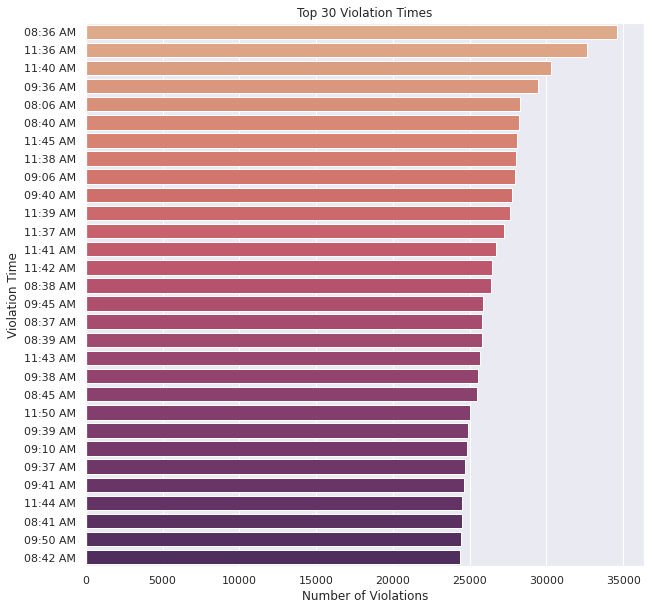

In [ ]:
sns.set()
plt.figure(figsize=(10,10))
sns.barplot( x = 'Number of Violations', y = 'Violation Time', data = vt_df, palette="flare")
plt.title('Top 30 Violation Times')
plt.xlabel('Number of Violations')
plt.ylabel('Violation Time')

### Tickets given each month

In [ ]:
month = []
for time_stamp in pd.to_datetime(data_2014_2015_df['Issue Date']):
    month.append(time_stamp.month)
month_count = pd.Series(month).value_counts()
month_count

# Renaming month numbers to month names
months = month_count.rename(index = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5:'May', 6:'June', 7: 'July', 8: 'Aug', 9: 'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})
months

Jan     1392992
June    1276592
May     1040148
Sept    1029583
July     969938
Oct      966456
Mar      965119
Apr      951716
Aug      911641
Nov      798897
Dec      774287
Feb      731864
dtype: int64

Text(0, 0.5, 'Number of Tickets')

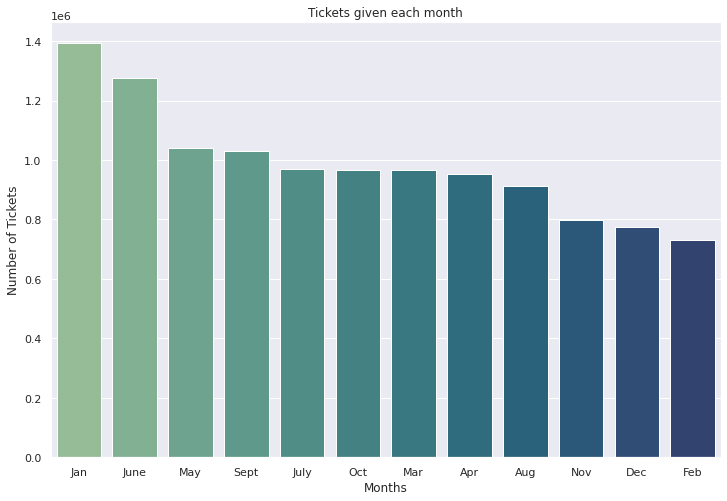

In [ ]:
sns.set()
plt.figure(figsize=(12,8))
sns.barplot(x = months.index, y = months.values, palette='crest')
plt.title('Tickets given each month')
plt.xlabel('Months')
plt.ylabel('Number of Tickets')

### Vehicle Body and Make types

In [ ]:
vehicle_Body = data_2014_2015_df['Vehicle Body Type'].value_counts()[0:20]
vehicle_Body

SUBN    3729346
4DSD    3340014
VAN     1709091
DELV     892781
SDN      524596
2DSD     319046
PICK     297562
UTIL      92580
REFG      89643
TRAC      77047
TAXI      69826
BUS       60383
CONV      53870
4 DR      52270
TRLR      39488
MCY       32026
TK        31199
WAGO      30817
P-U       28761
4D        27358
Name: Vehicle Body Type, dtype: int64

In [ ]:
vehicle_Make = data_2014_2015_df['Vehicle Make'].value_counts()[0:20]
vehicle_Make

FORD     1521874
TOYOT    1217087
HONDA    1102614
NISSA     908783
CHEVR     897845
FRUEH     432073
DODGE     403307
ME/BE     386609
BMW       377156
GMC       354039
INTER     350338
JEEP      302362
HYUND     275014
LEXUS     251618
ACURA     214310
CHRYS     209736
VOLKS     207931
INFIN     169296
NS/OT     153781
LINCO     146057
Name: Vehicle Make, dtype: int64

Text(0, 0.5, 'Vehicles Count')

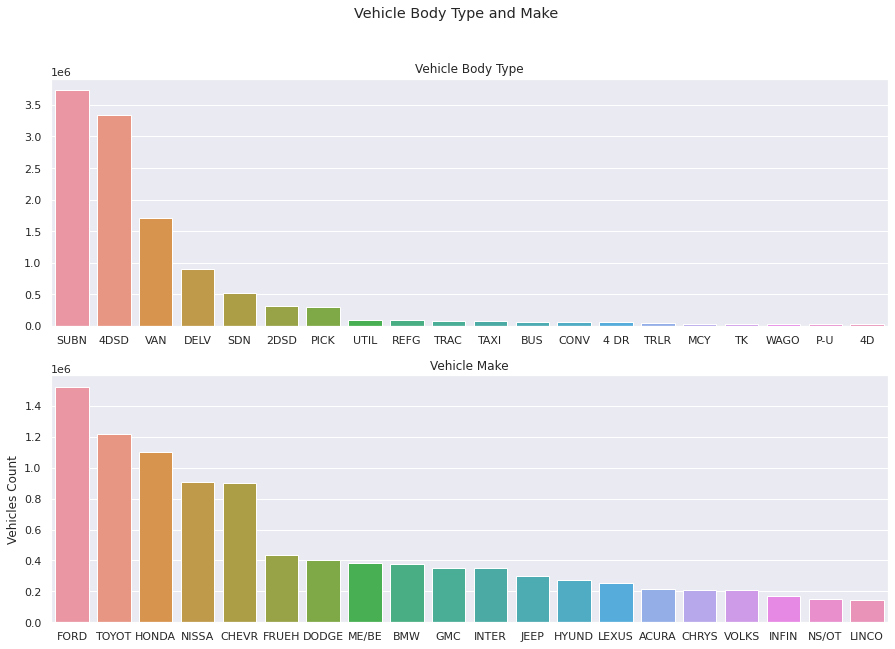

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('Vehicle Body Type and Make')

# Vehicle Body Type
plt.ylabel('Vehicles Count')
sns.barplot(ax=axes[0], x=vehicle_Body.index, y=vehicle_Body.values)
axes[0].set_title("Vehicle Body Type")

# Vehicle Make
sns.barplot(ax=axes[1], x=vehicle_Make.index, y=vehicle_Make.values)
axes[1].set_title("Vehicle Make")
plt.ylabel('Vehicles Count')

### Vehicle Colors

In [ ]:
vehicle_Color = data_2014_2015_df['Vehicle Color'].value_counts()[0:20]
vehicle_Color

GY       1717544
WH       1646969
WHITE    1623445
BK       1360825
BLACK     776197
BL        600835
GREY      469722
RD        375327
SILVE     358475
BROWN     355818
BLUE      339620
RED       308602
GR        259223
GREEN     169024
TN        167625
OTHER     124201
YW         95426
BR         95170
BLK        87844
GRAY       80975
Name: Vehicle Color, dtype: int64

Text(0, 0.5, 'Number of Cars')

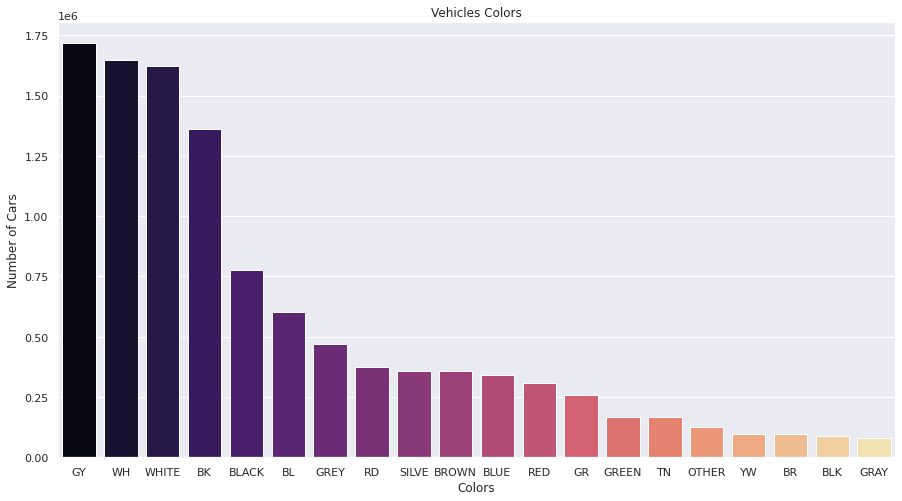

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = vehicle_Color.index, y = vehicle_Color.values, palette='magma')
plt.title('Vehicles Colors')
plt.xlabel('Colors')
plt.ylabel('Number of Cars')

### Street-Wise Violations

In [ ]:
street_wise = data_2014_2015_df['Street Name'].value_counts()[0:20]
street_wise

Broadway                240652
3rd Ave                 177066
5th Ave                 118780
Madison Ave             104339
Lexington Ave            93355
2nd Ave                  88256
1st Ave                  84210
7th Ave                  73161
EB SHORE PKWY @ WEST     73004
Queens Blvd              70403
Amsterdam Ave            64856
8th Ave                  64758
EB HORACE HARDING EX     60964
6th Ave                  58864
Jamaica Ave              57569
Columbus Ave             50466
Park Ave                 46148
37th Ave                 46012
HORACE HARDING EXPWY     45806
Coney Island Ave         42504
Name: Street Name, dtype: int64

Text(0, 0.5, 'Streets')

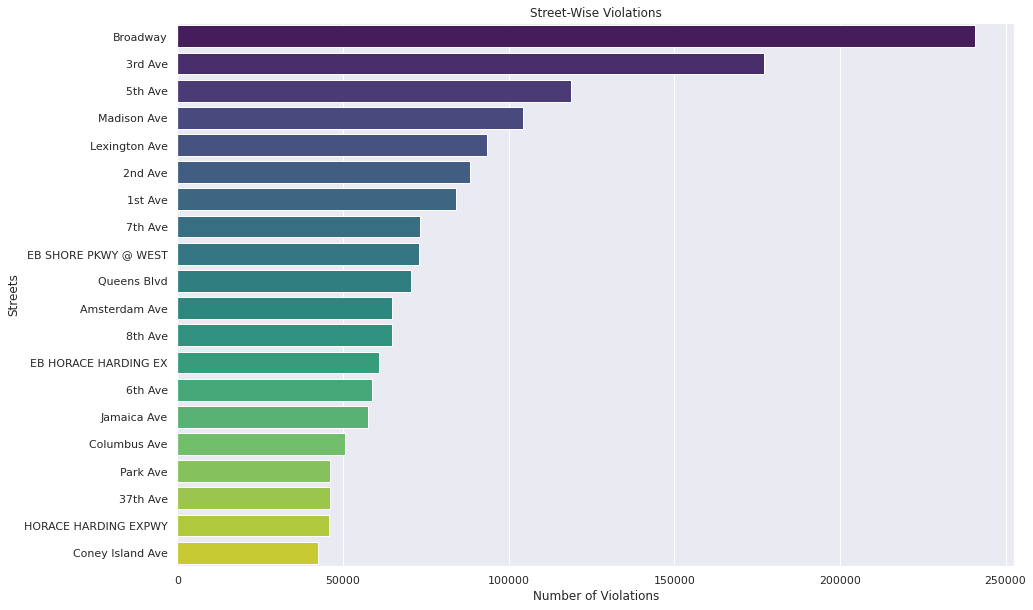

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = street_wise.values, y = street_wise.index, palette='viridis')
plt.title('Street-Wise Violations')
plt.xlabel('Number of Violations')
plt.ylabel('Streets')

### Violations per Violation Code

In [ ]:
violation_desc = data_2014_2015_df["Violation Description"].value_counts()[0:20]
violation_desc

38-Failure to Display Muni Rec    1410663
21-No Parking (street clean)      1375160
14-No Standing                     886685
PHTO SCHOOL ZN SPEED VIOLATION     839197
37-Expired Muni Meter              792077
FAILURE TO STOP AT RED LIGHT       719745
20A-No Parking (Non-COM)           500896
71A-Insp Sticker Expired (NYS)     480760
40-Fire Hydrant                    421685
69-Failure to Disp Muni Recpt      284475
19-No Stand (bus stop)             256389
BUS LANE VIOLATION                 224516
70A-Reg. Sticker Expired (NYS)     194140
46A-Double Parking (Non-COM)       180641
31-No Stand (Com. Mtr. Zone)       167721
46B-Double Parking (Com-100Ft)     132756
47-Double PKG-Midtown              128564
16-No Std (Com Veh) Com Plate      122564
16A-No Std (Com Veh) Non-COM       122515
42-Exp. Muni-Mtr (Com. Mtr. Z)      93253
Name: Violation Description, dtype: int64

Text(0, 0.5, 'Violation Code and Description')

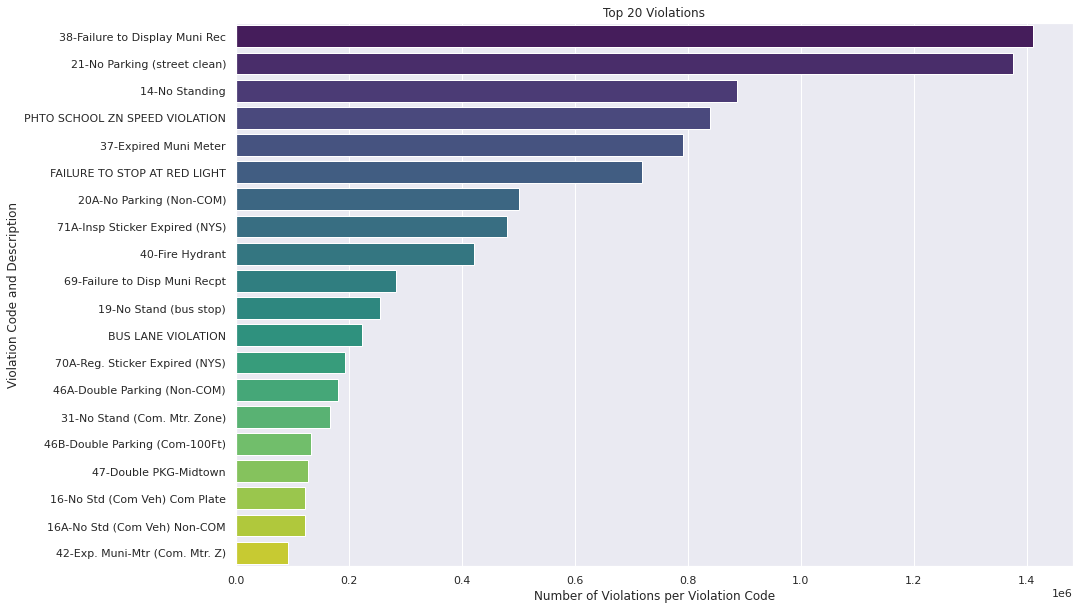

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = violation_desc.values, y = violation_desc.index, palette='viridis')
plt.title('Top 20 Violations')
plt.xlabel('Number of Violations per Violation Code')
plt.ylabel('Violation Code and Description')

### Vehicle Precinct